In [1]:
import pandas as pd
import numpy as np
import rfit
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dfviz = pd.read_csv('/Users/manishatherupalli/Desktop/ML FINAL PROJECT/Dataset/OnlineNewsPopularity_Viz.csv')

In [3]:
dfviz.head()
rfit.dfchk(dfviz)


dataframe Basic Check function -

1: info(): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            39644 non-null  object 
 1   timedelta                      39644 non-null  float64
 2   n_tokens_title                 39644 non-null  float64
 3   n_tokens_content               39644 non-null  float64
 4   n_unique_tokens                39644 non-null  float64
 5   n_non_stop_words               39644 non-null  float64
 6   n_non_stop_unique_tokens       39644 non-null  float64
 7   num_hrefs                      39644 non-null  float64
 8   num_self_hrefs                 39644 non-null  float64
 9   num_imgs                       39644 non-null  float64
 10  num_videos                     39644 non-null  float64
 11  average_token_length           39644 non-null  float64
 12 

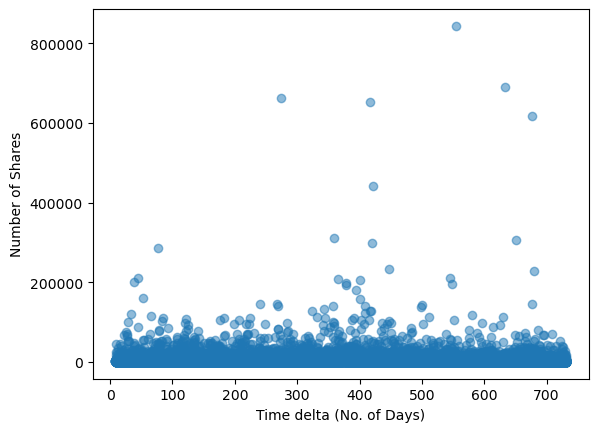

In [4]:
plt.scatter(x='timedelta',y='shares',data=dfviz,alpha=0.5)
plt.xlabel("Time delta (No. of Days)")
plt.ylabel("Number of Shares")
plt.show()

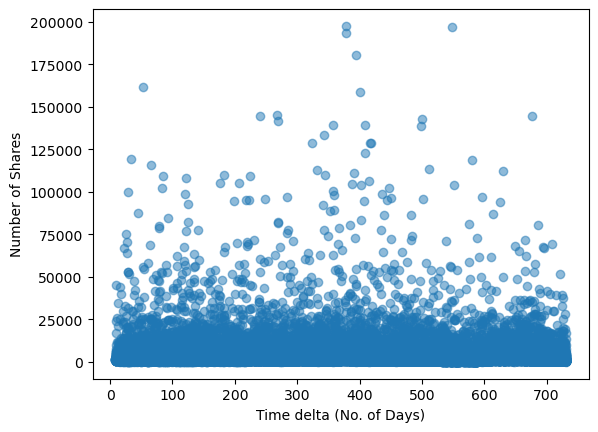

In [5]:
# There are many outliers in the dataset, so i will subset it to get a better view
dfviz1 = dfviz[dfviz['shares']<200000]
plt.scatter(x='timedelta',y='shares',data=dfviz1,alpha=0.5)
plt.xlabel("Time delta (No. of Days)")
plt.ylabel("Number of Shares")
plt.show()

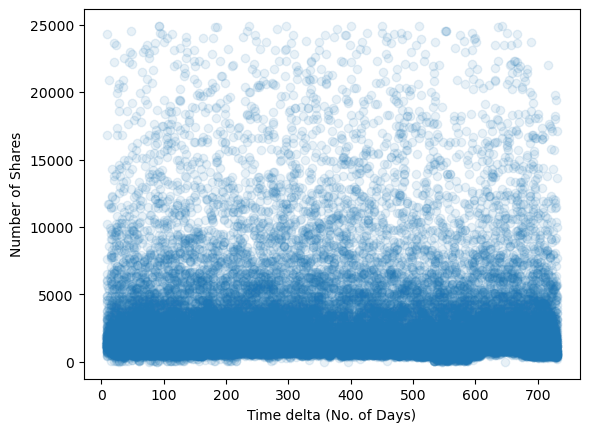

In [6]:
# Subsetting it further
dfviz2 = dfviz[dfviz['shares']<25000]
plt.scatter(x='timedelta',y='shares',data=dfviz2,alpha=0.1)
plt.xlabel("Time delta (No. of Days)")
plt.ylabel("Number of Shares")
plt.show()

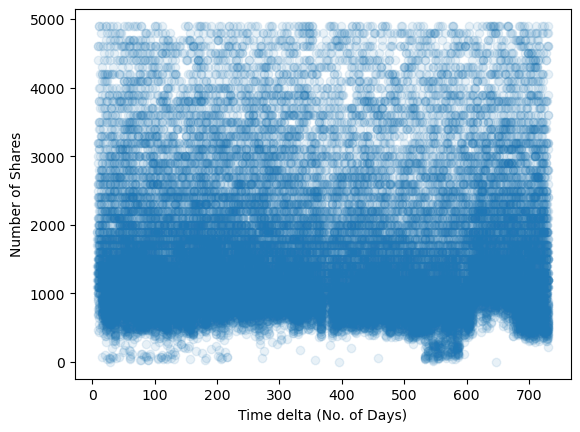

In [7]:
# and further..
dfviz3 = dfviz[dfviz['shares']<5000]
plt.scatter(x='timedelta',y='shares',data=dfviz3,alpha=0.1)
plt.xlabel("Time delta (No. of Days)")
plt.ylabel("Number of Shares")
plt.show()

In [8]:
print("The number of articles within 0 - 5000 shares: ",len(dfviz3))
print("The number of articles within 0 - 25000 shares: ",len(dfviz2))
print("The number of articles within 0 - 200000 shares: ",len(dfviz1))
print("The number of articles in the dataset: ",len(dfviz))

The number of articles within 0 - 5000 shares:  34464
The number of articles within 0 - 25000 shares:  39066
The number of articles within 0 - 200000 shares:  39627
The number of articles in the dataset:  39644


In [9]:
dfviz = dfviz[dfviz['timedelta']>21]

In [10]:
dfviz.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,target,Data_Channel,Publish_DOW
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0,Entertainment,Monday
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0,Business,Monday
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1,Business,Monday
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0,Entertainment,Monday
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0,Technology,Monday


/Users/manishatherupalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


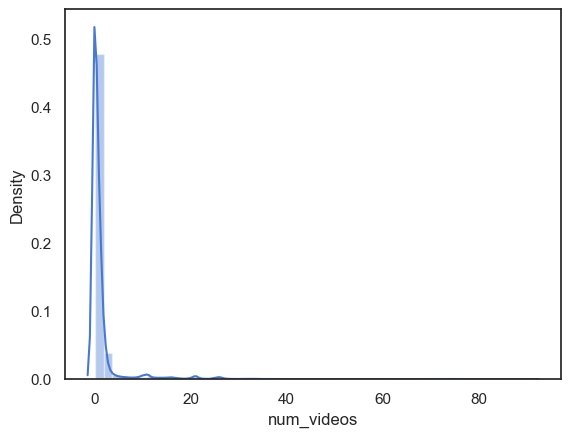

In [11]:
# First seeing the ditribution of num_videos
sns.set(style="white", palette="muted")
sns.distplot(dfviz['num_videos'], color="b")
plt.show()

In [31]:
print(dfviz.num_videos.isin([0,1]).value_counts())

True     32866
False     5040
Name: num_videos, dtype: int64


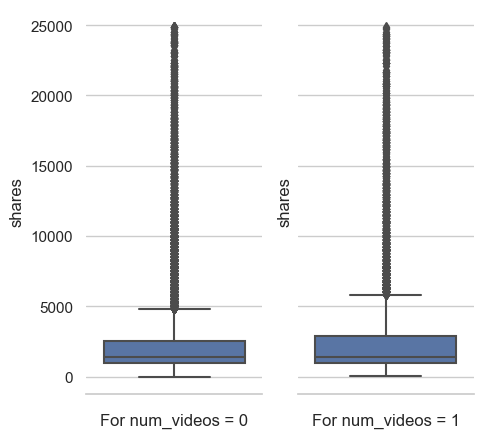

In [13]:
dfviz0 = dfviz2[dfviz2['num_videos']==0]
dfviz1 = dfviz2[dfviz2['num_videos']==1]

sns.set(style="whitegrid")
f, axes = plt.subplots(1, 2, figsize=(5, 5), sharey=True)
sns.despine(left=True)

sns.boxplot(data=dfviz0,y='shares',ax=axes[0])
axes[0].set(xlabel='For num_videos = 0')

sns.boxplot(data=dfviz1,y='shares',ax=axes[1])
axes[1].set(xlabel='For num_videos = 1')

plt.show()

Repeating same for number of images

/Users/manishatherupalli/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


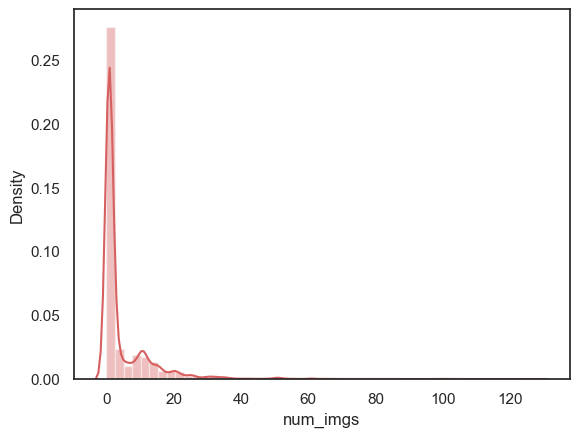

True     29053
False     8853
Name: num_imgs, dtype: int64


In [37]:
# Looking at the distribution first
sns.set(style="white", palette="muted")
sns.distplot(dfviz['num_imgs'], color="r")
plt.show()

# Looking at the value count in the interactive session, i found that majority of the num_imgs are distributed among 0,1,2,3,11. Looking at their value_counts.

print(dfviz.num_imgs.isin([0,1,2,3,11]).value_counts())


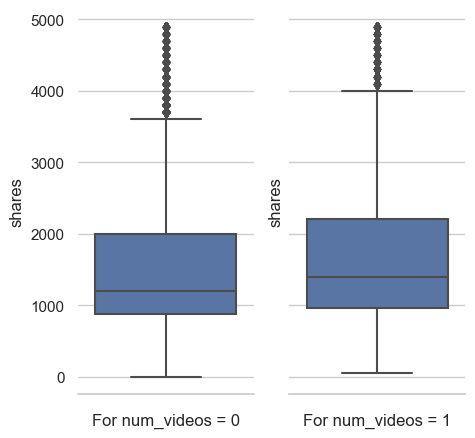

In [15]:
# Plotting a boxplot with these number of images vs the rest.
dfviz0 = dfviz3[dfviz3['num_imgs'].isin([0,1,2,3,11,10])]
dfviz1 = dfviz3[~dfviz3['num_imgs'].isin([0,1,2,3,11,10])]

sns.set(style="whitegrid")
f, axes = plt.subplots(1, 2, figsize=(5, 5), sharey=True)
sns.despine(left=True)

sns.boxplot(data=dfviz0,y='shares',ax=axes[0])
axes[0].set(xlabel='For num_videos = 0')

sns.boxplot(data=dfviz1,y='shares',ax=axes[1])
axes[1].set(xlabel='For num_videos = 1')

plt.show()


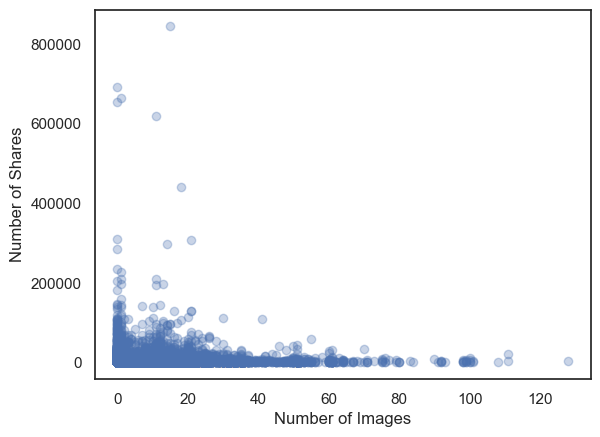

In [32]:
# However, just to reinforce this point, i will plot a scatter matrix to see any relation.
plt.scatter(dfviz.num_imgs,dfviz.shares,alpha=0.3)
plt.xlabel('Number of Images')
plt.ylabel('Number of Shares')
plt.show()

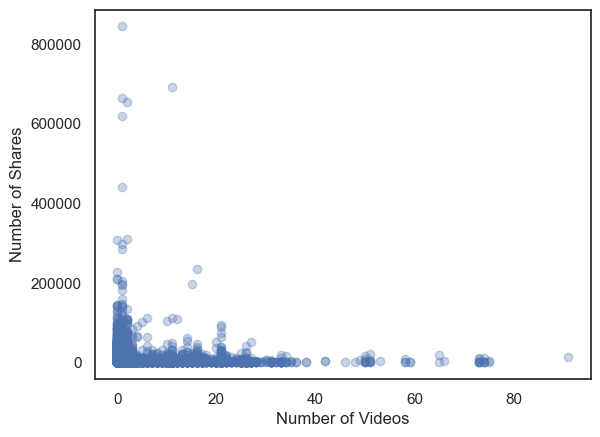

In [33]:
# No trend can be observed in this. Similarly, lets see for num_videos
plt.scatter(dfviz.num_videos,dfviz.shares,alpha=0.3)
plt.xlabel('Number of Videos')
plt.ylabel('Number of Shares')
plt.show()

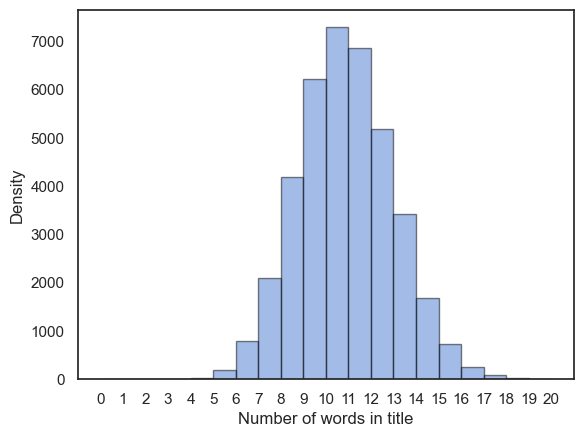

In [17]:
sns.set(style="white", palette="muted")
bins = np.linspace(0,20,21)

plt.hist(dfviz.n_tokens_title, bins, alpha=0.5, edgecolor='black', linewidth=1)
plt.xticks(np.arange(0,21, step=1))
plt.xlabel('Number of words in title')
plt.ylabel('Density')
plt.show() 

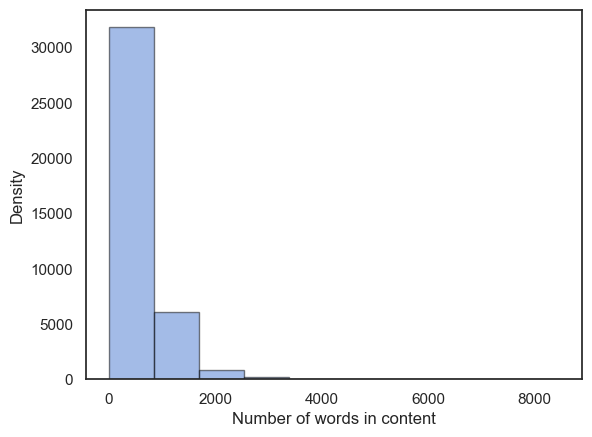

In [18]:
sns.set(style="white", palette="muted")
#bins = np.linspace(0,20,21)

plt.hist(dfviz.n_tokens_content, alpha=0.5, edgecolor='black', linewidth=1)
#plt.xticks(np.arange(0,21, step=1))
plt.xlabel('Number of words in content')
plt.ylabel('Density')
plt.show()
#Wow, n_token_titles seems to have a perfect normal distribution in the dataset with average value at around 10

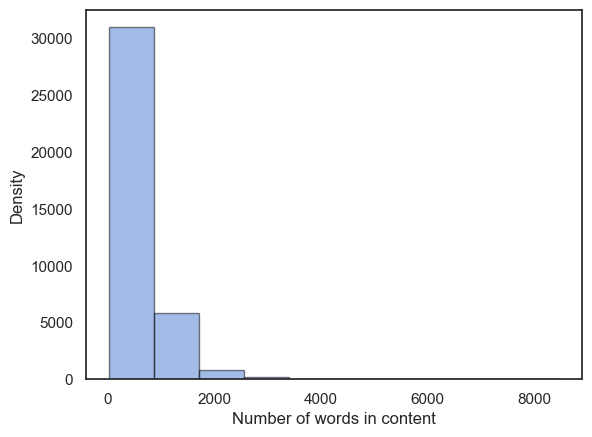

In [34]:
# Looking at distribution of n_tokens_content

sns.set(style="white", palette="muted")
#bins = np.linspace(0,20,21)

plt.hist(dfviz.n_tokens_content, alpha=0.5, edgecolor='black', linewidth=1)
#plt.xticks(np.arange(0,21, step=1))
plt.xlabel('Number of words in content')
plt.ylabel('Density')
plt.show() 

# Seems like 0-2000 is heavily populated. So lets split the distribution and have a look.

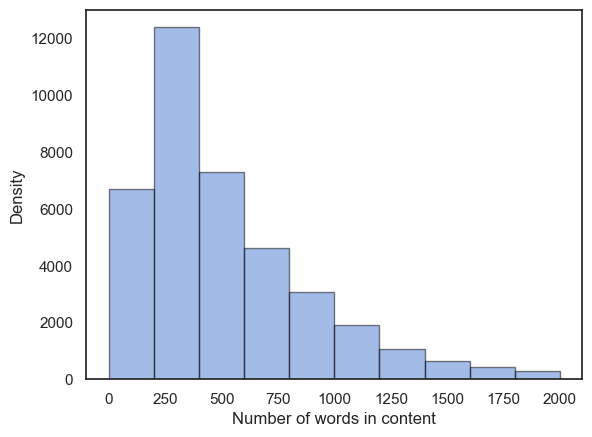

In [19]:

sns.set(style="white", palette="muted")
#bins = np.linspace(0,20,21)
# For 0-1000
plt.hist(dfviz[dfviz.n_tokens_content<2000].n_tokens_content, alpha=0.5, edgecolor='black', linewidth=1)
#plt.xticks(np.arange(0,21, step=1))
plt.xlabel('Number of words in content')
plt.ylabel('Density')
plt.show() 



In [20]:
print(dfviz.n_tokens_content.value_counts())

0.0       1110
286.0       98
335.0       86
279.0       85
225.0       85
          ... 
2228.0       1
4878.0       1
1861.0       1
2958.0       1
2776.0       1
Name: n_tokens_content, Length: 2403, dtype: int64


In [36]:
a = dfviz[dfviz['n_tokens_content']==0].url.reset_index().drop('index',axis=1)
print(a.values)

[]


In [22]:
dfviz = dfviz[dfviz['n_tokens_content']!=0]


In [23]:
print(dfviz.n_tokens_title.value_counts())

10.0    7084
11.0    6656
9.0     6059
12.0    4999
8.0     4089
13.0    3288
7.0     2067
14.0    1612
6.0      786
15.0     704
16.0     233
5.0      182
17.0      87
4.0       27
18.0      21
3.0        5
19.0       5
2.0        1
20.0       1
Name: n_tokens_title, dtype: int64


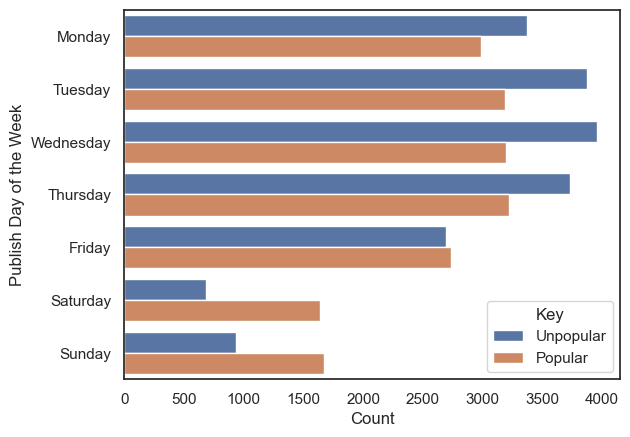

In [25]:
#Evaluating whether Day of Week has any effect on popularity
sns.set(style='white')
dfviz['target1']=np.where(dfviz.target==1,'Popular','Unpopular')
sns.countplot(y=dfviz.Publish_DOW,hue=dfviz.target1)
plt.legend(title='Key')
plt.xlabel('Count')
plt.ylabel('Publish Day of the Week')
plt.show()

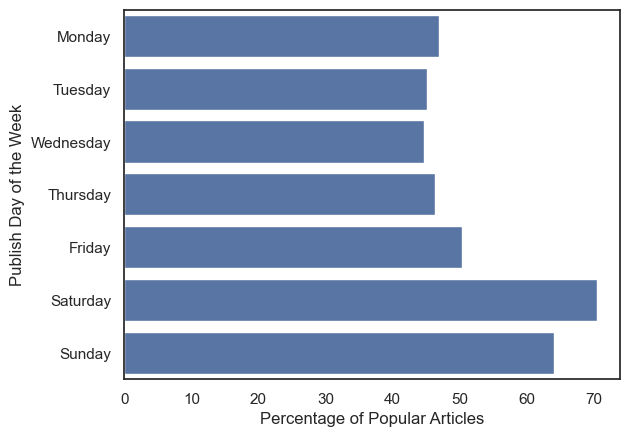

In [26]:
new = dfviz.groupby('Publish_DOW',as_index=False).aggregate({"url":"count","target":"sum"})
new['Percent'] = (new.target/new.url)*100
ord = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
sns.barplot(y=new.Publish_DOW,x=new.Percent,order=ord,color='b')
plt.xlabel('Percentage of Popular Articles')
plt.ylabel('Publish Day of the Week')
plt.show()

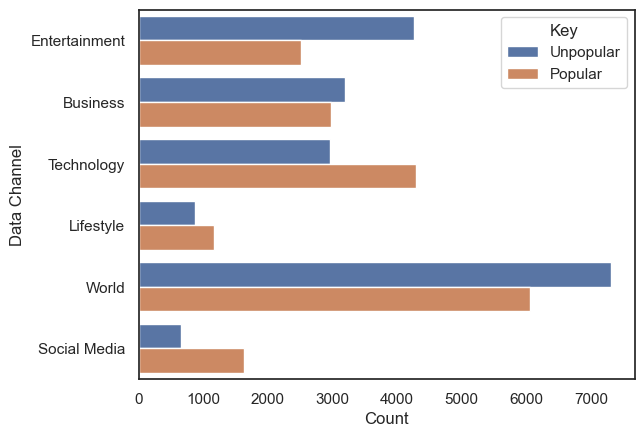

In [27]:
#Evaluating whether Data Channel has any effect on popularity
sns.countplot(y=dfviz.Data_Channel,hue=dfviz.target1)
plt.legend(title='Key')
plt.xlabel('Count')
plt.ylabel('Data Channel')
plt.show()


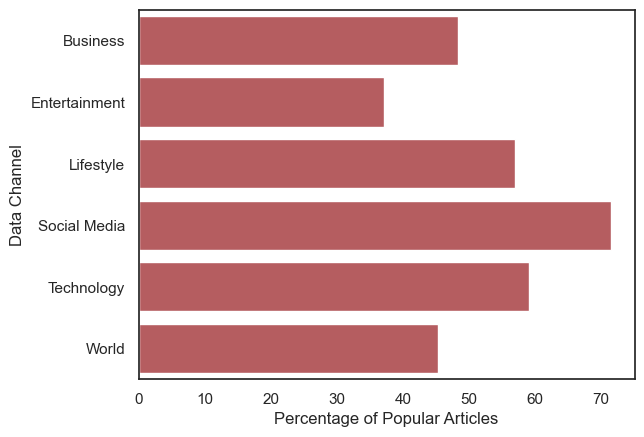

In [28]:
new1 = dfviz.groupby('Data_Channel',as_index=False).aggregate({"url":"count","target":"sum"})
new1['Percent'] = (new1.target/new1.url)*100
sns.barplot(y=new1.Data_Channel,x=new1.Percent,color='r')
plt.xlabel('Percentage of Popular Articles')
plt.ylabel('Data Channel')
plt.show()

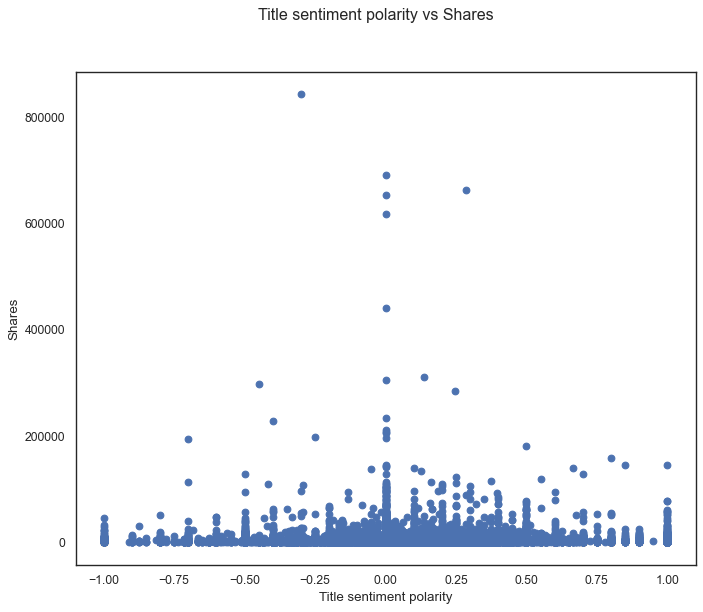

In [29]:
# Having a look at title sentiment vs number of shares
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)
plt.scatter(dfviz['title_sentiment_polarity'],dfviz['shares'])
plt.xlabel("Title sentiment polarity")
plt.ylabel("Shares")
plt.suptitle('Title sentiment polarity vs Shares')
fig.savefig("title_sentiment_polarity.png")
plt.show()

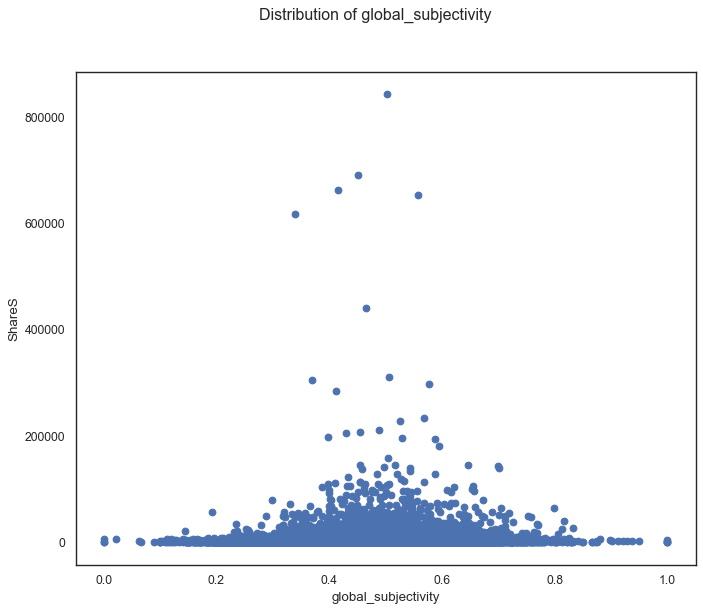

In [30]:
# Now looking at the Global subjectivity of the text w.r.t shares
fig=plt.figure(figsize=(10,8), dpi= 80, facecolor='w', edgecolor='k')
ax=fig.add_subplot(111)
plt.scatter(dfviz['global_subjectivity'],dfviz['shares'])
plt.xlabel('global_subjectivity')
plt.ylabel('ShareS')
plt.suptitle('Distribution of global_subjectivity')
plt.show()
fig.savefig("global_subjectivity.png")